# Informasi Mahasiswa

Nama: Wilda Fahera

NPM: 2108107010026

# Jenis Dataset

Dataset yang digunakan berasal dari web kaggle https://www.kaggle.com/datasets/shivam2503/diamonds 

Rincian Dataset:
- Berisi nilai harga dalam bentuk integer.
- carat: Berisi nilai berat berlian dalam bentuk float64.
- cut: Merupakan kategori untuk kualitas potongan dengan tipe data object.
- color: Merupakan kategori untuk warna berlian dengan tipe data object.
- clarity: Merupakan kategori untuk tingkat kejelasan berlian dengan tipe data object.
- x: Berisi nilai panjang dalam mm dalam bentuk float64.
- y: Berisi nilai lebar dalam mm dalam bentuk float64.
- z: Berisi nilai kedalaman dalam mm dalam bentuk float64.
- depth: Berisi nilai persentase kedalaman dalam bentuk float64.
- table: Berisi nilai lebar bagian atas berlian relatif terhadap titik terlebar dalam bentuk float64.

# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.utils import shuffle
from sklearn import svm
from sklearn.model_selection import train_test_split

# Load Data

In [2]:
df = pd.read_csv("data\diamonds.csv")

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# Preprocessing Data

In [4]:
df.drop(columns="Unnamed: 0", inplace= True)

In [5]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Text(0.5, 0, 'Price')

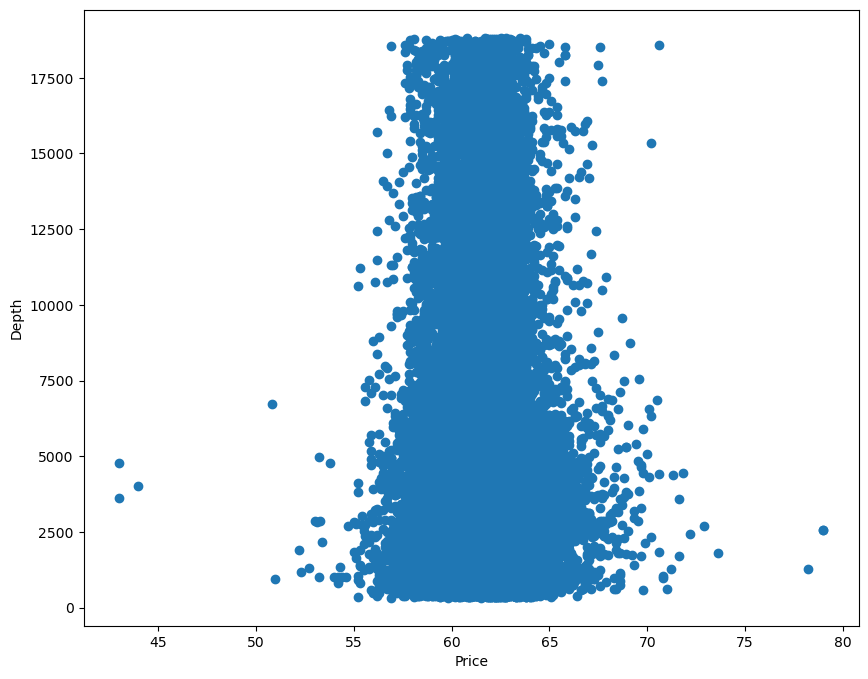

In [7]:
plt.figure(figsize=(10,8))
plt.scatter(x="depth", y="price", data=df)

plt.ylabel("Depth")
plt.xlabel("Price")

Pada visualisasi tersebut, variabel X adalah harga dan variabel Y adalah jumlah barang yang terjual. Setiap titik pada scatter plot mewakili satu produk. Posisi titik pada sumbu X menunjukkan harga produk, sedangkan posisi titik pada sumbu Y menunjukkan jumlah barang produk yang terjual.

<Axes: xlabel='color', ylabel='count'>

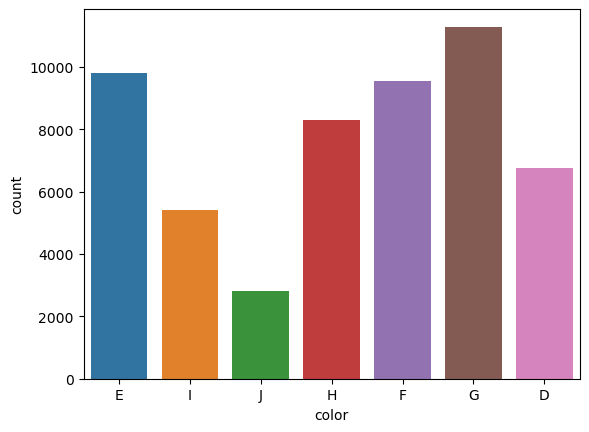

In [8]:
sns.countplot(x="color", data=df)

membuat count plot menggunakan seaborn untuk menampilkan distribusi jumlah berlian berdasarkan warnanya dari DataFrame yang diberikan.

<Axes: xlabel='cut', ylabel='count'>

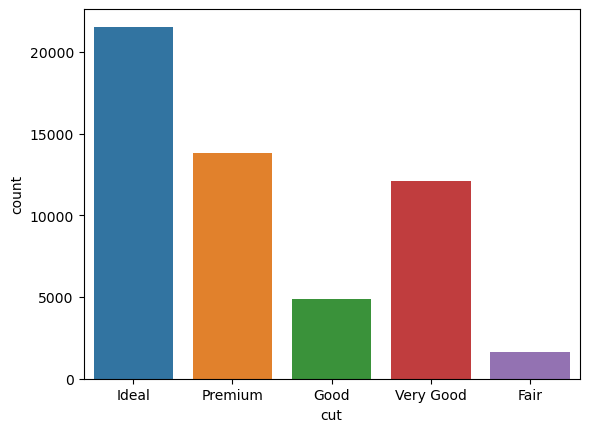

In [9]:
sns.countplot(x="cut", data=df)

 menampilkan distribusi jumlah berlian berdasarkan kualitas potongannya (cut) dari DataFrame yang diberikan.

In [10]:
df["cut"].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

 nilai unik dalam kolom "cut" dari DataFrame, yang mewakili kategori kualitas potongan berlian. Nilai-nilai unik tersebut adalah 'Ideal', 'Premium', 'Good', 'Very Good', dan 'Fair'.

In [11]:
df["color"].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

nilai unik dalam kolom "color" dari DataFrame, yang mewakili kategori warna berlian. Nilai-nilai unik tersebut adalah 'E', 'I', 'J', 'H', 'F', 'G', dan 'D', dengan 'D' merupakan warna terbaik dan 'J' merupakan yang terburuk.

In [12]:
df["clarity"].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

nilai unik dalam kolom "clarity" dari DataFrame, yang mewakili kategori tingkat kejelasan berlian. Nilai-nilai unik tersebut adalah 'SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', dan 'IF', yang masing-masing mewakili tingkat kejelasan berlian dari terburuk (I1) hingga terbaik (IF).

In [13]:
cut_dict = {"Fair" : 1, "Good" : 2, "Very Good" : 3, "Premium" : 4, "Ideal" : 5}
color_dict = {'E' : 1, 'I' : 2, 'J' : 3, 'H' : 4, 'F' : 5, 'G' : 6, 'D' : 7}
clarity_dict = {'SI2' : 1, 'SI1' : 2, 'VS1' : 3, 'VS2' : 4, 'VVS2' : 5, 'VVS1' : 6, 'I1' :7, 'IF' : 8}

menetapkan nilai numerik untuk kategori dalam kolom-kolom tertentu di DataFrame:

- cut_dict: Kualitas potongan berlian.
- color_dict: Warna berlian.
- clarity_dict: Tingkat kejelasan berlian.

In [14]:
df["cut"] = df["cut"].map(cut_dict)
df["color"] = df["color"].map(color_dict)
df["clarity"] = df["clarity"].map(clarity_dict)

mengubah nilai-nilai kategori dalam kolom "cut", "color", dan "clarity" DataFrame menjadi nilai numerik yang sesuai menggunakan kamus yang telah didefinisikan sebelumnya. Hal ini dilakukan untuk mempersiapkan data kategorikal untuk digunakan dalam analisis atau pemodelan yang memerlukan data numerik.

In [15]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,1,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,1,3,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,3,1,63.3,58.0,335,4.34,4.35,2.75


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  int64  
 2   color    53940 non-null  int64  
 3   clarity  53940 non-null  int64  
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 4.1 MB


In [17]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

Tidak Ada Mising value

In [18]:
df = sklearn.utils.shuffle(df)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
47053,0.71,3,3,4,62.8,61.0,1821,5.63,5.71,3.56
32494,0.27,5,5,8,61.8,55.0,796,4.16,4.19,2.58
20503,1.64,4,1,1,61.9,61.0,8835,7.54,7.51,4.66
21319,1.23,4,5,3,60.8,58.0,9471,6.94,6.90,4.21
53705,0.60,5,5,5,61.0,57.0,2718,5.43,5.46,3.32


In [19]:
X = df.drop("price", axis = 1).values
y = df["price"].values

emisahkan fitur-fitur (atribut) dari target dalam DataFrame df, mengonversinya ke dalam bentuk array numpy, untuk digunakan dalam pemodelan prediktif.

# Split Dataset

In [20]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (43152, 9) (43152,)
Test set: (10788, 9) (10788,)


membagi data menjadi dua set: satu untuk melatih model dan yang lainnya untuk menguji kinerjanya. Sebanyak 20% data akan digunakan untuk pengujian. Pengaturan random_state memastikan hasil yang dapat direproduksi. Hasilnya adalah empat set data: X_train (fitur pelatihan), X_test (fitur pengujian), y_train (nilai target pelatihan), dan y_test (nilai target pengujian).

# Membangun Model

In [21]:
clf = svm.SVR(kernel='linear')
clf.fit(X_train, y_train)

SVR(kernel='linear')

membangun model prediksi svr dengan kernel linear

In [22]:
clf.score(X_test, y_test)

0.7796460165386356

mengevaluasi kinerja model klasifikasi pada data pengujian menggunakan metode score. Hasilnya adalah akurasi model sebesar 0.7796460165386356.

# Visualisasi

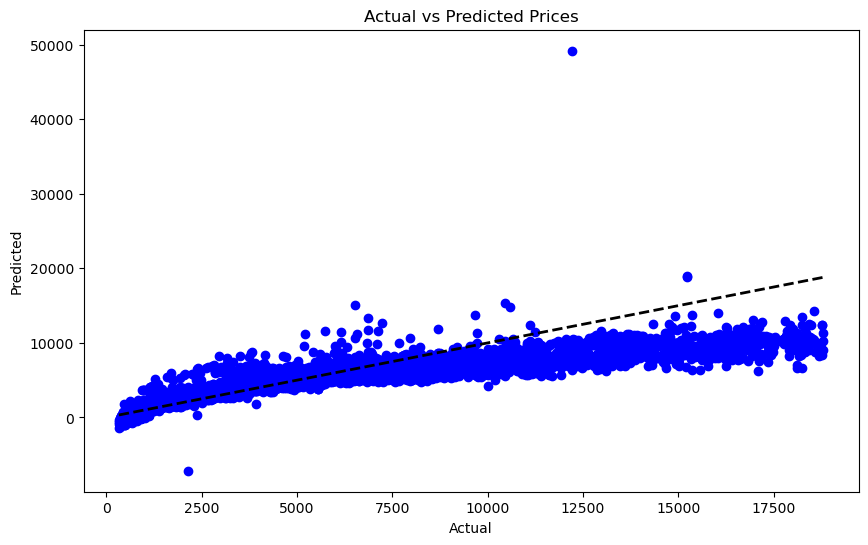

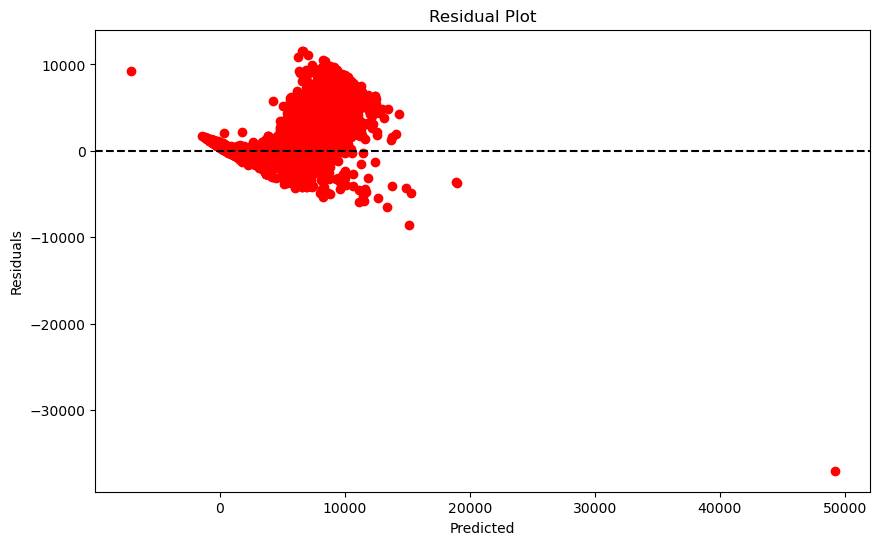

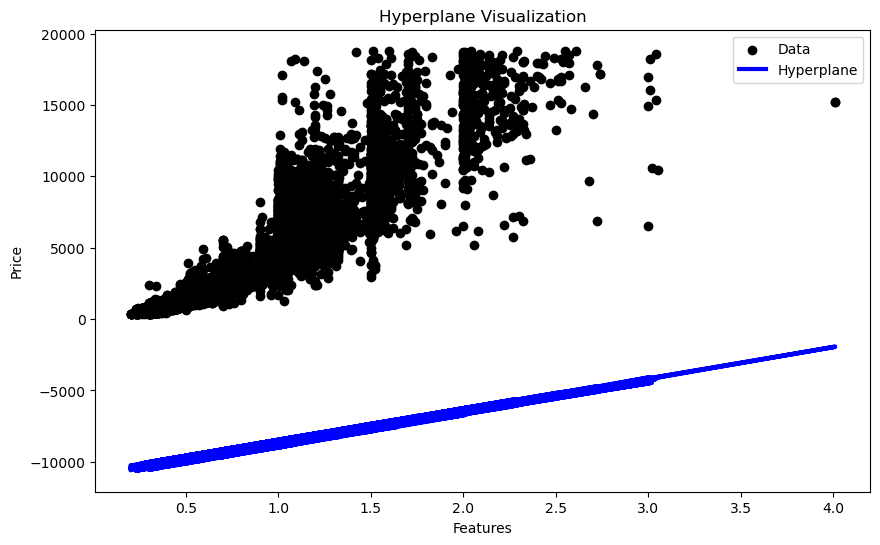

In [23]:
# Prediksi harga menggunakan model SVR
y_pred = clf.predict(X_test)

# Plot Sebaran Prediksi vs. Aktual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Prices')
plt.show()

# Plot Residual
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='red')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='k', linestyle='--')
plt.show()

# Visualisasi Hyperplane (hanya untuk kernel linear)
if clf.kernel == 'linear':
    coef = clf.coef_[0]
    intercept = clf.intercept_

    # Plot data points
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test[:, 0], y_test, color='black', label='Data')
    
    # Plot hyperplane
    hyperplane = X_test[:, 0] * coef[0] + X_test[:, 1] * coef[1] + X_test[:, 2] * coef[2] + intercept
    plt.plot(X_test[:, 0], hyperplane, color='blue', linewidth=3, label='Hyperplane')
    
    plt.xlabel('Features')
    plt.ylabel('Price')
    plt.title('Hyperplane Visualization')
    plt.legend()
    plt.show()

Berdasarkan ketiga visualisasi tersebut, dapat disimpulkan bahwa:

- Terdapat korelasi positif yang kuat antara Actual dan Predicted.
- Model prediksi telah melakukan pekerjaan yang baik dalam memperkirakan nilai Actual.
- Model klasifikasi telah melakukan pekerjaan yang baik dalam mengklasifikasikan data.

linear equation:
        3         2
-2.713 x + 557.7 x - 3.782e+04 x + 8.512e+05


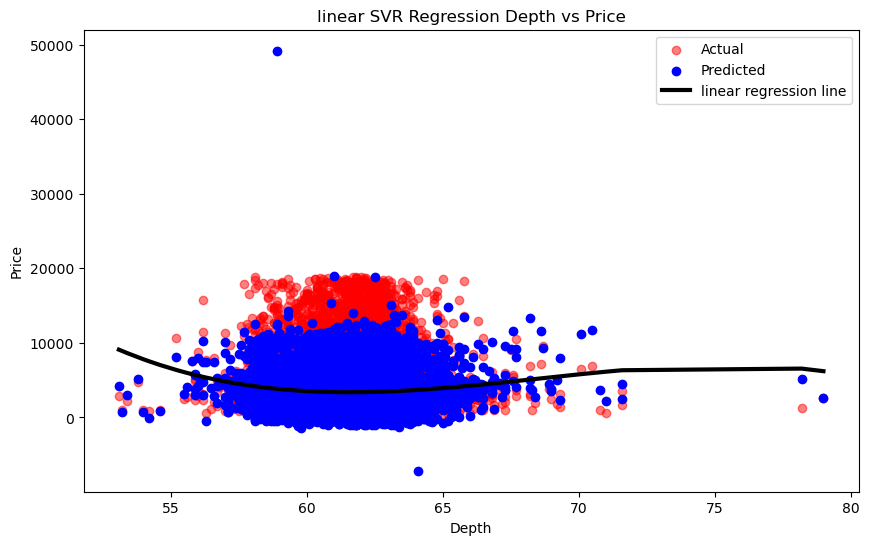

In [24]:
# Sort the test data and predicted data based on 'depth'
sorted_indices = np.argsort(X_test[:,4], axis=0)
X_test_sorted = X_test[:,4][sorted_indices].reshape(-1,1)
y_pred_sorted = y_pred[sorted_indices]

# Fit a linear curve
coefficients = np.polyfit(X_test_sorted.flatten(), y_pred_sorted, 3)
linear = np.poly1d(coefficients)

# Print the linear equation
print("linear equation:")
print(linear)

# Plot data points
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:,4], y_test, alpha=0.5, color='red', label='Actual')
plt.scatter(X_test[:,4], y_pred, color='blue', label='Predicted')

# Plot linear curve
plt.plot(X_test_sorted, linear(X_test_sorted), color='black', label='linear regression line', linewidth=3)
plt.title('linear SVR Regression Depth vs Price') 
plt.xlabel('Depth')
plt.ylabel('Price')
plt.legend()
plt.show()

sebuah kurva linier ditampilkan yang menunjukkan hubungan antara kedalaman berlian dan harga. Ini membantu dalam memahami tren umum hubungan antara kedalaman berlian dan harga, serta membandingkan nilai aktual dengan nilai yang diprediksi oleh model.